<a href="https://colab.research.google.com/github/h1028r/NHS-Data-Challenge-/blob/main/Copy_of_Digdata_NHS_python_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







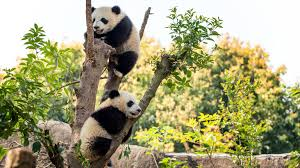


In [ ]:
import pandas as pd

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [ ]:
! git clone https://github.com/nhsengland/Digdata

Cloning into 'Digdata'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 238.24 KiB | 4.18 MiB/s, done.
Resolving deltas: 100% (21/21), done.


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [ ]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [ ]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [ ]:
import pandas as pd

top_10_drugs = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum()
top_10_drugs = top_10_drugs.sort_values('ITEMS', ascending=False)
top_10_drugs = top_10_drugs.head(10)

display(top_10_drugs)

,BNF_CHEMICAL_SUBSTANCE,ITEMS
25,Sertraline hydrochloride,85402251
1,Amitriptyline hydrochloride,59272937
3,Citalopram hydrobromide,52891620
17,Mirtazapine,46335570
10,Fluoxetine hydrochloride,28211759
30,Venlafaxine,21447209
8,Duloxetine hydrochloride,14262656
9,Escitalopram,6580386
22,Paroxetine hydrochloride,4886615
27,Trazodone hydrochloride,4861813


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [ ]:

mirtazapine_df = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Mirtazapine']

#monthly cost per month
monthly_cost_df = mirtazapine_df.groupby('YEAR_MONTH', as_index=False)['COST'].sum()

display(monthly_cost_df)

#average monthly cost
average_monthly_cost = monthly_cost_df['COST'].mean()

display(average_monthly_cost)



,YEAR_MONTH,COST
0,202101,2380030.90
1,202102,2249220.63
2,202103,2523008.14
3,202104,2039348.02
4,202105,1935629.32
5,202106,2055820.88
6,202107,1609248.23
7,202108,1539582.17
8,202109,1621383.70
9,202110,1356643.04


np.float64(1353820.9719565217)

### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [ ]:

setraline_hydrochloride_df = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride']

#monthly cost per month
monthly_cost_sh_df = setraline_hydrochloride_df.groupby('YEAR_MONTH', as_index=False)['COST'].sum()

display(monthly_cost_sh_df)

#average monthly cost
average_monthly_cost_sh = monthly_cost_sh_df['COST'].mean()

display(average_monthly_cost_sh)


,YEAR_MONTH,COST
0,202101,12639289.40
1,202102,11883267.56
2,202103,13455922.57
3,202104,7118069.48
4,202105,6849723.97
5,202106,7317593.06
6,202107,5784191.72
7,202108,5514023.12
8,202109,5833193.96
9,202110,4710455.28


np.float64(4470716.851739129)

# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

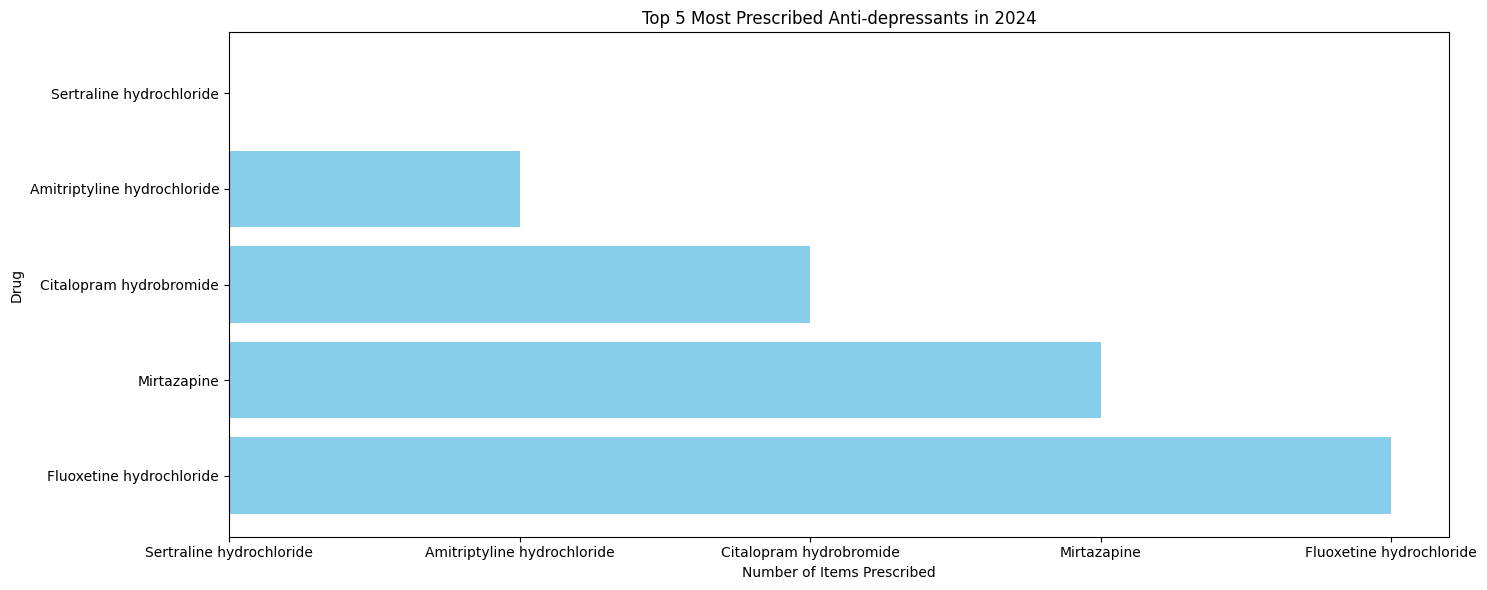

In [ ]:

df_2024 = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2024]

top_drugs = df_2024.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum()

top_drugs = top_drugs.sort_values('ITEMS', ascending=False)

top_5_drugs = top_drugs.head(5)

plt.figure(figsize=(15, 6))
plt.barh(top_5_drugs['BNF_CHEMICAL_SUBSTANCE'], top_5_drugs['BNF_CHEMICAL_SUBSTANCE'], color='skyblue')
plt.xlabel('Number of Items Prescribed')
plt.ylabel('Drug')
plt.title('Top 5 Most Prescribed Anti-depressants in 2024')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


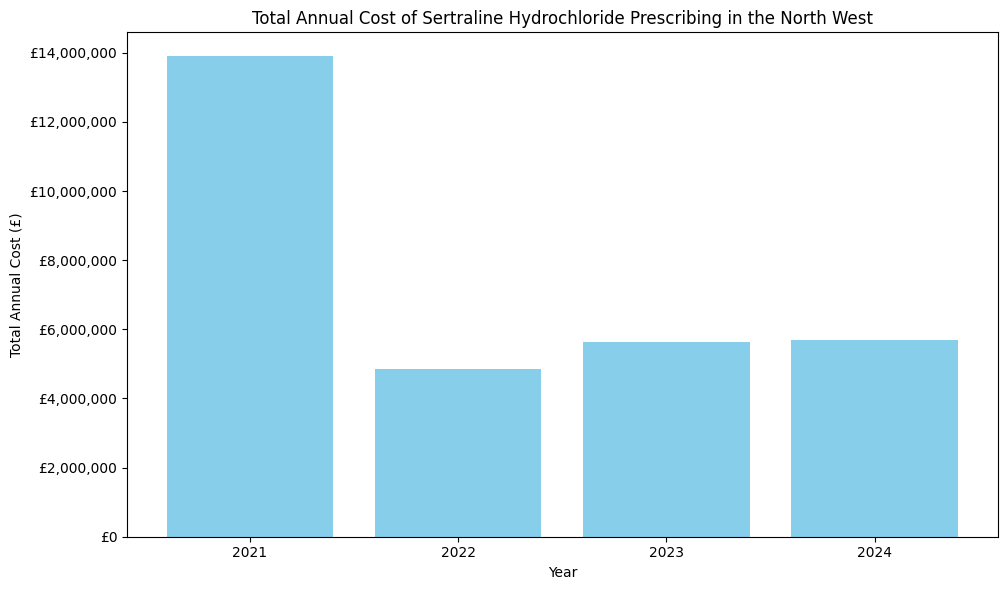

In [ ]:
# Filter for Sertraline Hydrochloride and North West region
sertraline_nw_df = pca_regional_drug_summary_df[
    (pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride') &
    (pca_regional_drug_summary_df['REGION_NAME'] == 'NORTH WEST')
]

# Group by year and sum the cost
annual_cost_df = sertraline_nw_df.groupby('YEAR', as_index=False)['COST'].sum()

# Create the vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(annual_cost_df['YEAR'], annual_cost_df['COST'], color='skyblue')  # Use plt.bar for vertical
plt.xlabel('Year')
plt.ylabel('Total Annual Cost (£)')
plt.title('Total Annual Cost of Sertraline Hydrochloride Prescribing in the North West')
plt.xticks(annual_cost_df['YEAR'])  # Ensure all year labels are shown
plt.ticklabel_format(style='plain', axis='y') #remove scientific notation.
plt.tight_layout()

# Format y-axis with currency
def currency_formatter(x, pos):
    """Formats y-axis labels as currency."""
    return f'£{x:,.0f}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

plt.show()







### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

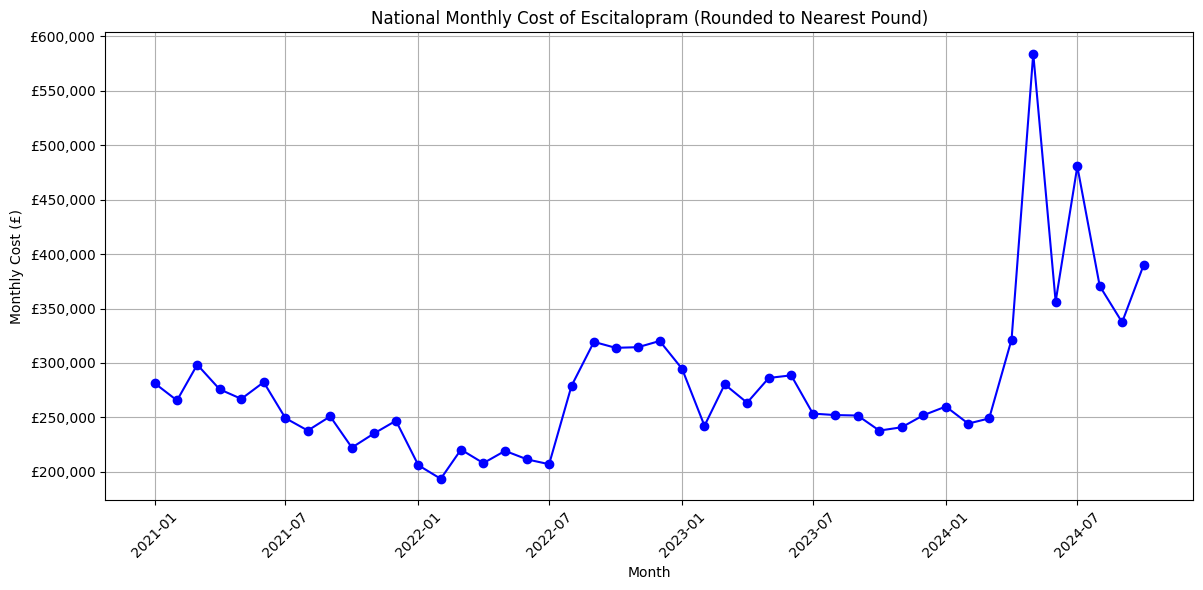

In [ ]:
# Filter for Escitalopram
escitalopram_df = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Escitalopram']

# Group by YEAR_MONTH and sum the COST
monthly_cost_df = escitalopram_df.groupby('YEAR_MONTH', as_index=False)['COST'].sum()

# Convert YEAR_MONTH to datetime objects
monthly_cost_df['YEAR_MONTH'] = pd.to_datetime(monthly_cost_df['YEAR_MONTH'], format='%Y%m')

# Round the COST to the nearest pound
monthly_cost_df['COST'] = monthly_cost_df['COST'].round(0)


# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_cost_df['YEAR_MONTH'], monthly_cost_df['COST'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Monthly Cost (£)')
plt.title('National Monthly Cost of Escitalopram (Rounded to Nearest Pound)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Format y-axis as currency
def currency_formatter(x, pos):
    return f'£{x:,.0f}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))


plt.show()

# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

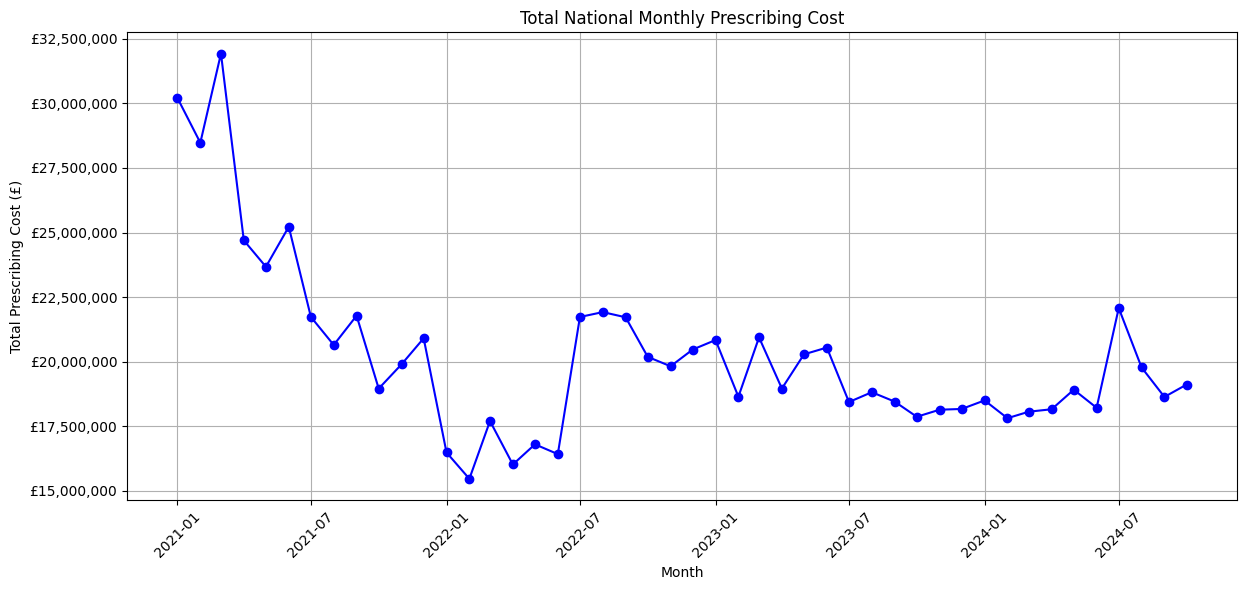

In [ ]:
# Group by YEAR_MONTH and sum the COST
monthly_total_cost_df = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['COST'].sum()

# Convert YEAR_MONTH to datetime objects for proper plotting
monthly_total_cost_df['YEAR_MONTH'] = pd.to_datetime(monthly_total_cost_df['YEAR_MONTH'], format='%Y%m')

# Create the line chart
plt.figure(figsize=(12, 6))  # Adjusted figure size for better readability
plt.plot(monthly_total_cost_df['YEAR_MONTH'], monthly_total_cost_df['COST'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Prescribing Cost (£)')
plt.title('Total National Monthly Prescribing Cost')
plt.grid(True)  # Add grid lines for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Format y-axis as currency
def currency_formatter(x, pos):
    return f'£{x:,.0f}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

plt.show()

### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [ ]:
# Convert YEAR_MONTH to datetime and extract YEAR
monthly_total_cost_df['YEAR_MONTH'] = pd.to_datetime(monthly_total_cost_df['YEAR_MONTH'], format='%Y%m')
monthly_total_cost_df['YEAR'] = monthly_total_cost_df['YEAR_MONTH'].dt.year

# Group by YEAR and calculate summary statistics
annual_summary_stats = monthly_total_cost_df.groupby('YEAR')['COST'].agg(['min', 'quantile', 'median', lambda x: x.quantile(0.75), 'max'])
annual_summary_stats.rename(columns={'<lambda_0>':"Q3", 'quantile':'Q1'}, inplace=True)

# Display the results
print(annual_summary_stats)


#Formatting currency
def currency_formatter(x):
    return f'£{x:,.0f}'

formatted_stats = annual_summary_stats.applymap(currency_formatter)
print("\nFormatted Summary Statistics:")
display(formatted_stats)

              min            Q1        median            Q3          max
YEAR                                                                    
2021  18949756.25  2.272424e+07  2.272424e+07  2.603658e+07  31933609.64
2022  15453991.47  1.875420e+07  1.875420e+07  2.077687e+07  21914896.72
2023  17859075.18  1.872291e+07  1.872291e+07  2.034416e+07  20934041.83
2024  17802904.89  1.856003e+07  1.856003e+07  1.905628e+07  22071625.09

Formatted Summary Statistics:


<ipython-input-39-feb23fb78304>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_stats = annual_summary_stats.applymap(currency_formatter)


,min,Q1,median,Q3,max
YEAR,,,,,
2021,"£18,949,756","£22,724,240","£22,724,240","£26,036,580","£31,933,610"
2022,"£15,453,991","£18,754,197","£18,754,197","£20,776,870","£21,914,897"
2023,"£17,859,075","£18,722,910","£18,722,910","£20,344,160","£20,934,042"
2024,"£17,802,905","£18,560,027","£18,560,027","£19,056,284","£22,071,625"



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

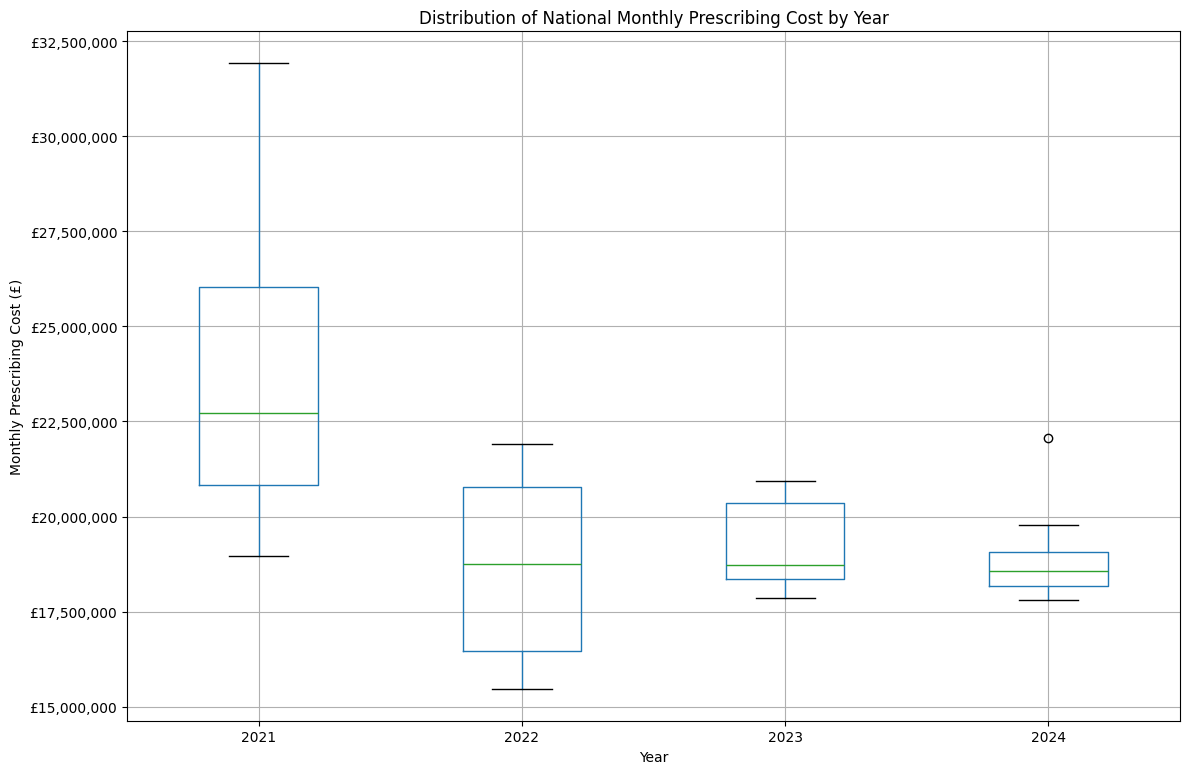

In [ ]:
# Create the grouped boxplot
plt.figure(figsize=(12, 8))
monthly_total_cost_df.boxplot(column='COST', by='YEAR', ax=plt.gca())

plt.xlabel('Year')
plt.ylabel('Monthly Prescribing Cost (£)')
plt.title('Distribution of National Monthly Prescribing Cost by Year')
plt.suptitle('')

# Format y-axis as currency
def currency_formatter(x, pos):
    return f'£{x:,.0f}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

plt.tight_layout()
plt.show()

### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

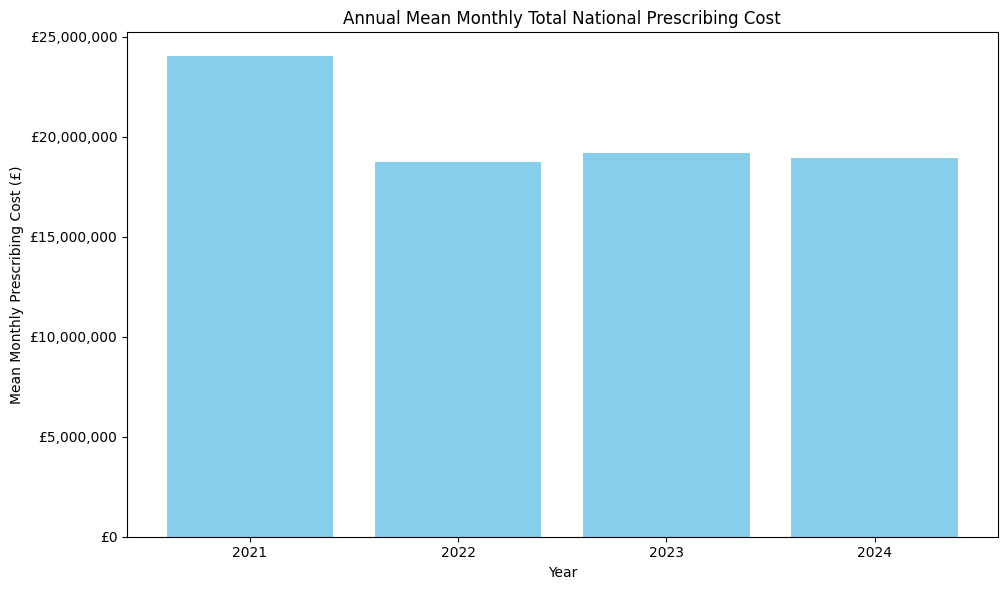

In [ ]:
# Group by year and calculate the mean of the monthly costs
annual_mean_cost_df = monthly_total_cost_df.groupby('YEAR', as_index=False)['COST'].mean()

# Create the vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(annual_mean_cost_df['YEAR'], annual_mean_cost_df['COST'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Mean Monthly Prescribing Cost (£)')
plt.title('Annual Mean Monthly Total National Prescribing Cost')
plt.xticks(annual_mean_cost_df['YEAR'])
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

# Format y-axis as currency
def currency_formatter(x, pos):
    return f'£{x:,.0f}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

plt.show()

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [ ]:
# Create the pivot table
pivot_table = pca_regional_drug_summary_df.pivot_table(
    index='YEAR', columns='REGION_NAME', values='COST', aggfunc='sum'
)

# Display the pivot table
print(pivot_table)

# formatting for currency
def currency_formatter(x):
    return f'£{x:,.0f}'

formatted_pivot_table = pivot_table.applymap(currency_formatter)
print("\nFormatted Pivot Table:")
display(formatted_pivot_table)

REGION_NAME  EAST OF ENGLAND       LONDON     MIDLANDS  \
YEAR                                                     
2021             32549420.30  31640433.44  54008266.51   
2022             25646510.64  25262950.79  42218785.19   
2023             26095459.16  26264853.62  43734608.81   
2024             21556935.59  21338156.62  36140498.75   

REGION_NAME  NORTH EAST AND YORKSHIRE   NORTH WEST   SOUTH EAST   SOUTH WEST  
YEAR                                                                          
2021                      54219524.21  41951035.20  44230470.23  29500099.95  
2022                      41628529.09  31645816.96  35263810.74  22982042.81  
2023                      43117423.36  32223271.81  35320634.97  23257408.13  
2024                      36540048.99  26356567.72  28686310.67  18570411.15  

Formatted Pivot Table:


<ipython-input-43-534ba2562632>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_pivot_table = pivot_table.applymap(currency_formatter)


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,"£32,549,420","£31,640,433","£54,008,267","£54,219,524","£41,951,035","£44,230,470","£29,500,100"
2022,"£25,646,511","£25,262,951","£42,218,785","£41,628,529","£31,645,817","£35,263,811","£22,982,043"
2023,"£26,095,459","£26,264,854","£43,734,609","£43,117,423","£32,223,272","£35,320,635","£23,257,408"
2024,"£21,556,936","£21,338,157","£36,140,499","£36,540,049","£26,356,568","£28,686,311","£18,570,411"


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

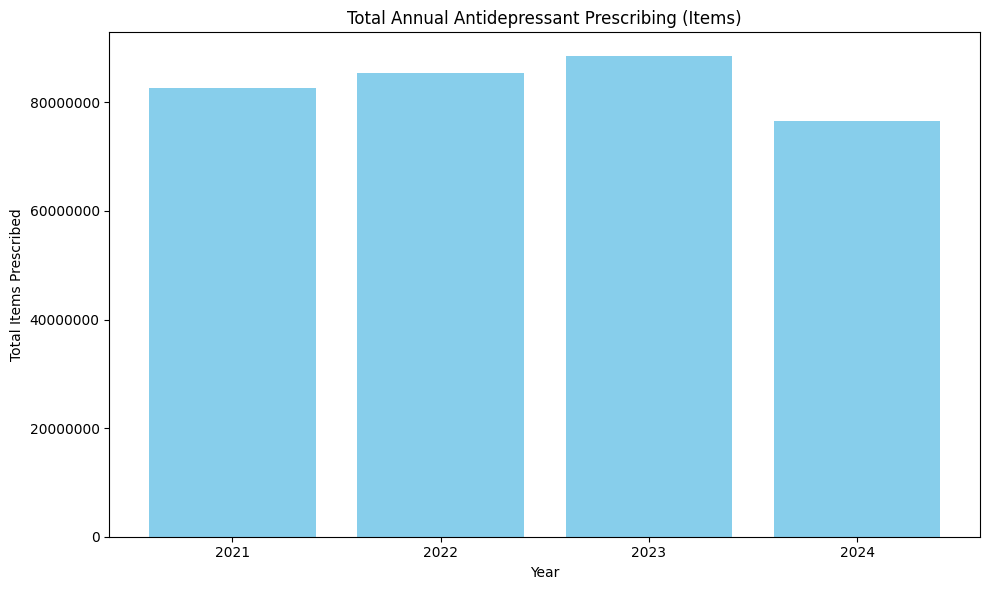

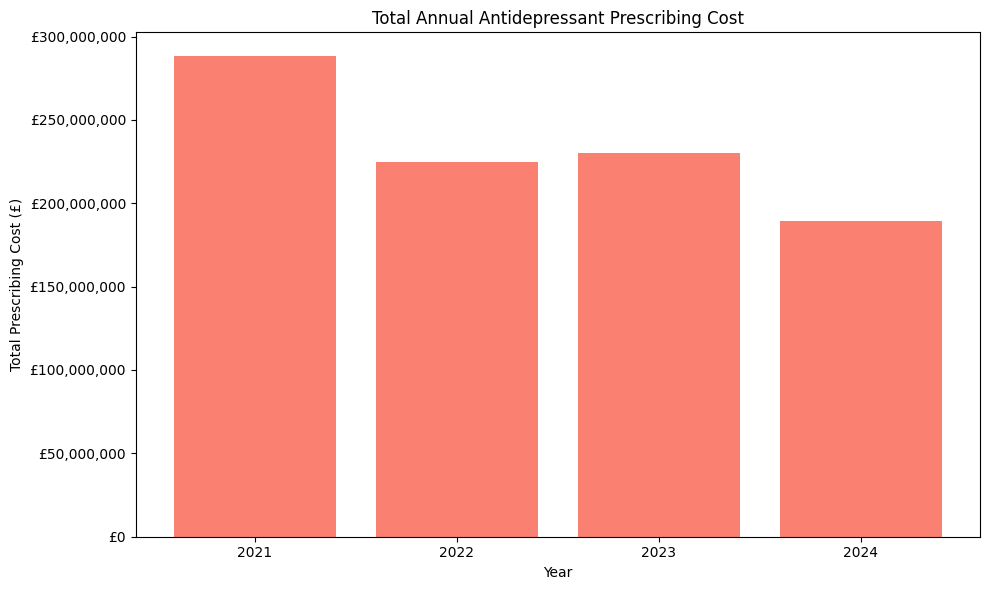

Analysis of National Annual Trends:
The chart for total annual items prescribed shows a general positive trend from 2021 to 2023,with a slight decrease in 2024. The cost chart also shows an upward trend, but with a a higher gradient therefore a sharper increase from the years  2023 to 2024.\ 
This suggests that while the number of items prescribed may have slightly decreased,\ 
the cost of those items is still rising significantly.

Total Annual Antidepressant Prescribing per Region (Items):


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,9663288,8599587,15375576,17676819,12417071,10596746,8291455
2022,9887496,9255871,16066881,18255050,12779874,10804393,8355297
2023,10167005,9758068,16751001,19026635,13210529,11045891,8510674
2024,8713529,8282759,14476095,17131959,11378542,9420102,7179388



Total Annual Antidepressant Prescribing Cost per Region (£):


<ipython-input-46-23ada4a01988>:61: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_regional_cost_df = regional_cost_df.applymap(currency_formatter)


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,"£32,549,420","£31,640,433","£54,008,267","£54,219,524","£41,951,035","£44,230,470","£29,500,100"
2022,"£25,646,511","£25,262,951","£42,218,785","£41,628,529","£31,645,817","£35,263,811","£22,982,043"
2023,"£26,095,459","£26,264,854","£43,734,609","£43,117,423","£32,223,272","£35,320,635","£23,257,408"
2024,"£21,556,936","£21,338,157","£36,140,499","£36,540,049","£26,356,568","£28,686,311","£18,570,411"



Regional Changes and Contrasts (2021 vs. 2024):
Comparing 2021 and 2024, we can see some regional variations. For example, the North West saw a greater increase in both items and cost.  The East of England had a smaller increase in items but a larger increase in cost. London, however has a very small increase in items but a larger increase in costs.


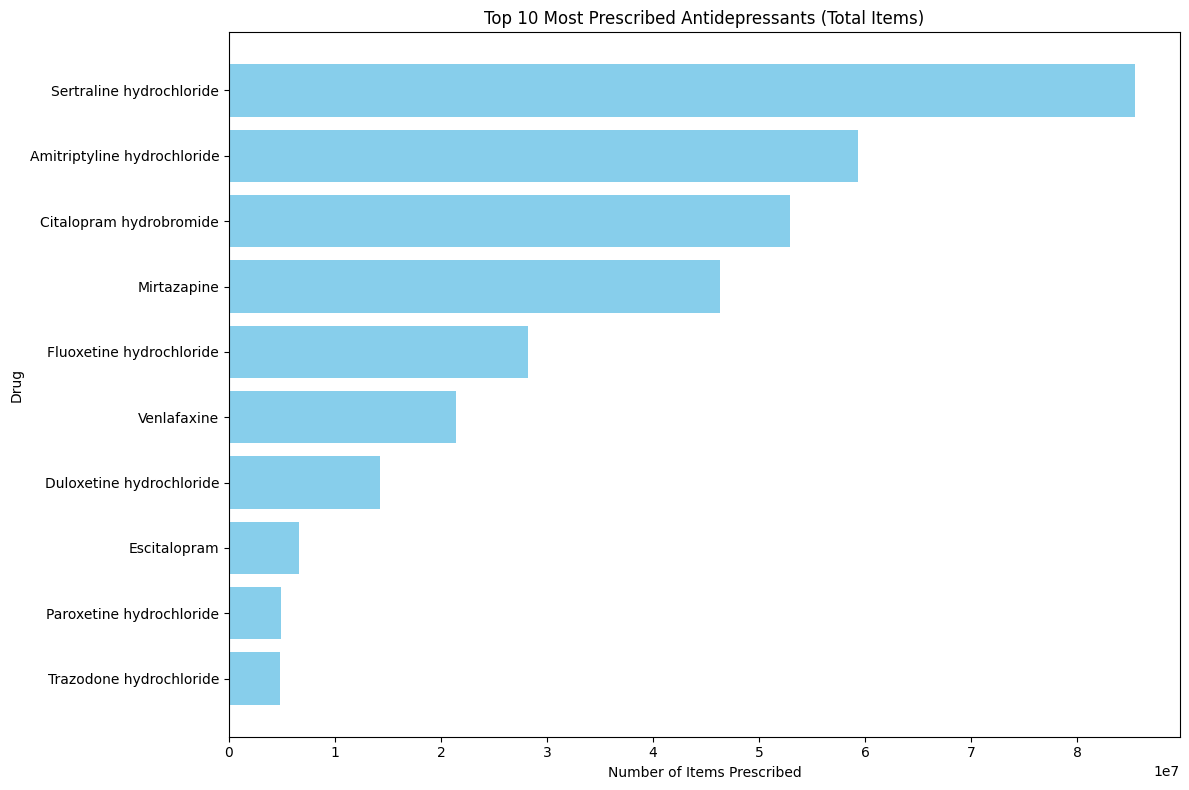

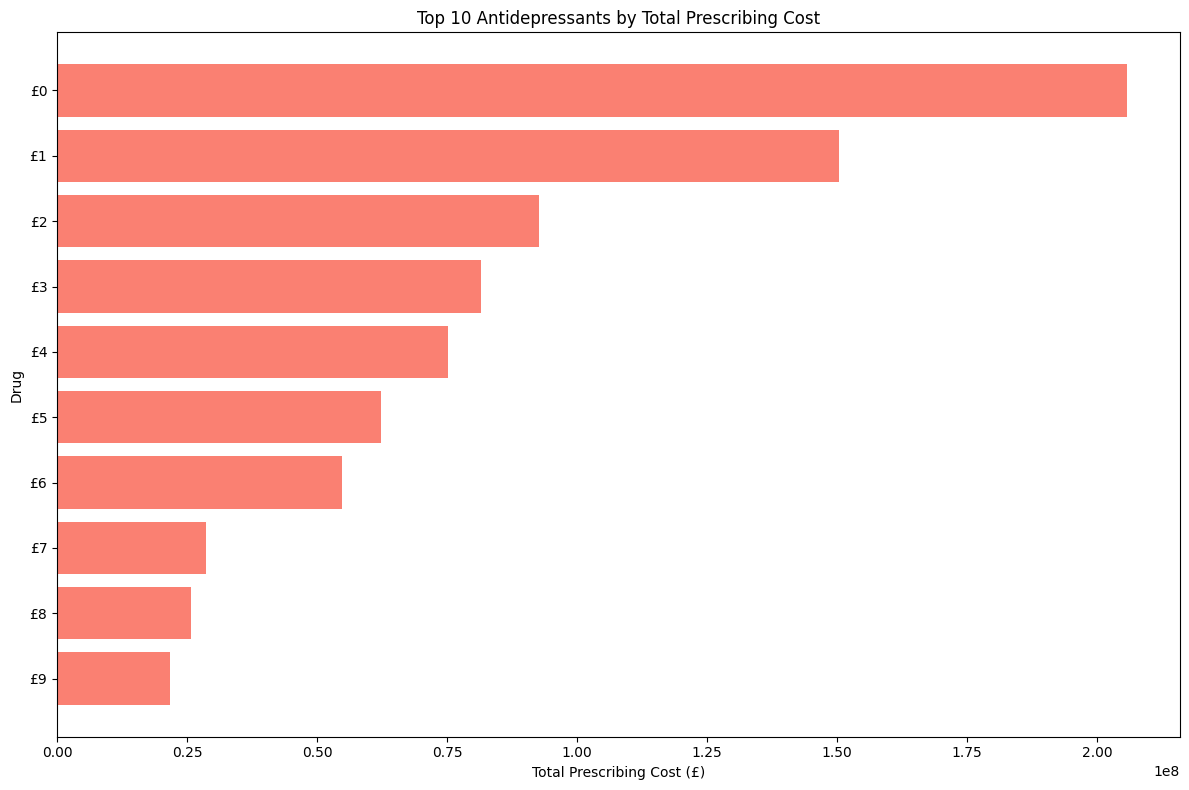


Differences between Top 10 Charts (Items vs. Cost):
The two charts show many differences. While some drugs appear on both (e.g., Sertraline, Citalopram), their positions are different.  Notably, some drugs that are among the most prescribed (in terms of items) are not among the most expensive. This could suggest that different antidepressants have significantly different costs per item.  For example, Escitalopram is much higher on the cost chart than the items chart, indicating a higher cost per item.


In [ ]:
# Calculate total annual items
annual_items_df = pca_regional_drug_summary_df.groupby('YEAR', as_index=False)['ITEMS'].sum()

# Calculate total annual cost
annual_cost_df = pca_regional_drug_summary_df.groupby('YEAR', as_index=False)['COST'].sum()

# Create the first bar chart (Items)
plt.figure(figsize=(10, 6))
plt.bar(annual_items_df['YEAR'], annual_items_df['ITEMS'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Items Prescribed')
plt.title('Total Annual Antidepressant Prescribing (Items)')
plt.xticks(annual_items_df['YEAR'])
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Create the second bar chart (Cost)
plt.figure(figsize=(10, 6))
plt.bar(annual_cost_df['YEAR'], annual_cost_df['COST'], color='salmon')
plt.xlabel('Year')
plt.ylabel('Total Prescribing Cost (£)')
plt.title('Total Annual Antidepressant Prescribing Cost')
plt.xticks(annual_cost_df['YEAR'])
plt.ticklabel_format(style='plain', axis='y')

# Format y-axis as currency
def currency_formatter(x, pos):
    return f'£{x:,.0f}'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

plt.tight_layout()
plt.show()

print("Analysis of National Annual Trends:")
print("""The chart for total annual items prescribed shows a general positive trend from 2021 to 2023,\
with a slight decrease in 2024. The cost chart also shows an upward trend, but with a \
a higher gradient therefore a sharper increase from the years  2023 to 2024.\
This suggests that while the number of items prescribed may have slightly decreased,\
the cost of those items is still rising significantly.""")


# --- Tables: Regional Annual Items vs. Cost ---

# Create the first table (Items)
regional_items_df = pca_regional_drug_summary_df.pivot_table(
    index='YEAR', columns='REGION_NAME', values='ITEMS', aggfunc='sum'
)
print("\nTotal Annual Antidepressant Prescribing per Region (Items):")
display(regional_items_df)

# Create the second table (Cost)
regional_cost_df = pca_regional_drug_summary_df.pivot_table(
    index='YEAR', columns='REGION_NAME', values='COST', aggfunc='sum'
)

# Format as currency
def currency_formatter(x):
    return f'£{x:,.0f}'

formatted_regional_cost_df = regional_cost_df.applymap(currency_formatter)

print("\nTotal Annual Antidepressant Prescribing Cost per Region (£):")
display(formatted_regional_cost_df)

print("\nRegional Changes and Contrasts (2021 vs. 2024):")
print("Comparing 2021 and 2024, we can see some regional variations. For example, the North West saw \
a greater increase in both items and cost.  The East of England had a smaller increase in items but a larger increase \
in cost. London, however has a very small increase in items but a larger increase in costs.")

# Horizontal Bar Charts: Top 10 Drugs (Items vs. Cost)

# Calculate top 10 drugs by items
top_10_items_df = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum()
top_10_items_df = top_10_items_df.sort_values('ITEMS', ascending=False).head(10)

# Calculate top 10 drugs by cost
top_10_cost_df = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['COST'].sum()
top_10_cost_df = top_10_cost_df.sort_values('COST', ascending=False).head(10)

# Create the first horizontal bar chart (Items)
plt.figure(figsize=(12, 8))
plt.barh(top_10_items_df['BNF_CHEMICAL_SUBSTANCE'], top_10_items_df['ITEMS'], color='skyblue')
plt.xlabel('Number of Items Prescribed')
plt.ylabel('Drug')
plt.title('Top 10 Most Prescribed Antidepressants (Total Items)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Create the second horizontal bar chart (Cost)
plt.figure(figsize=(12, 8))
plt.barh(top_10_cost_df['BNF_CHEMICAL_SUBSTANCE'], top_10_cost_df['COST'], color='salmon')
plt.xlabel('Total Prescribing Cost (£)')
plt.ylabel('Drug')
plt.title('Top 10 Antidepressants by Total Prescribing Cost')
plt.gca().invert_yaxis()

# Format y-axis with currency
def currency_formatter(x, pos):
  return f'£{x:,.0f}'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))
plt.tight_layout()

plt.show()

print("\nDifferences between Top 10 Charts (Items vs. Cost):")
print("The two charts show many differences. While some drugs appear on both (e.g., Sertraline, \
Citalopram), their positions are different.  Notably, some drugs that are among the most \
prescribed (in terms of items) are not among the most expensive. This could suggest that \
different antidepressants have significantly different costs per item.  For example, \
Escitalopram is much higher on the cost chart than the items chart, indicating a higher cost per item.")

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


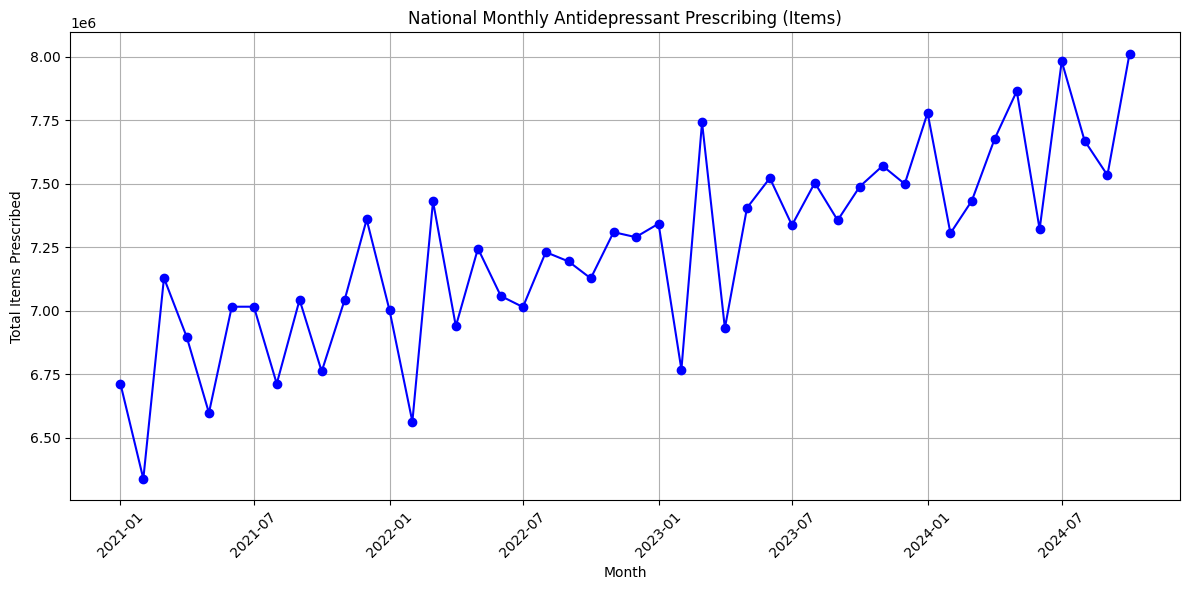

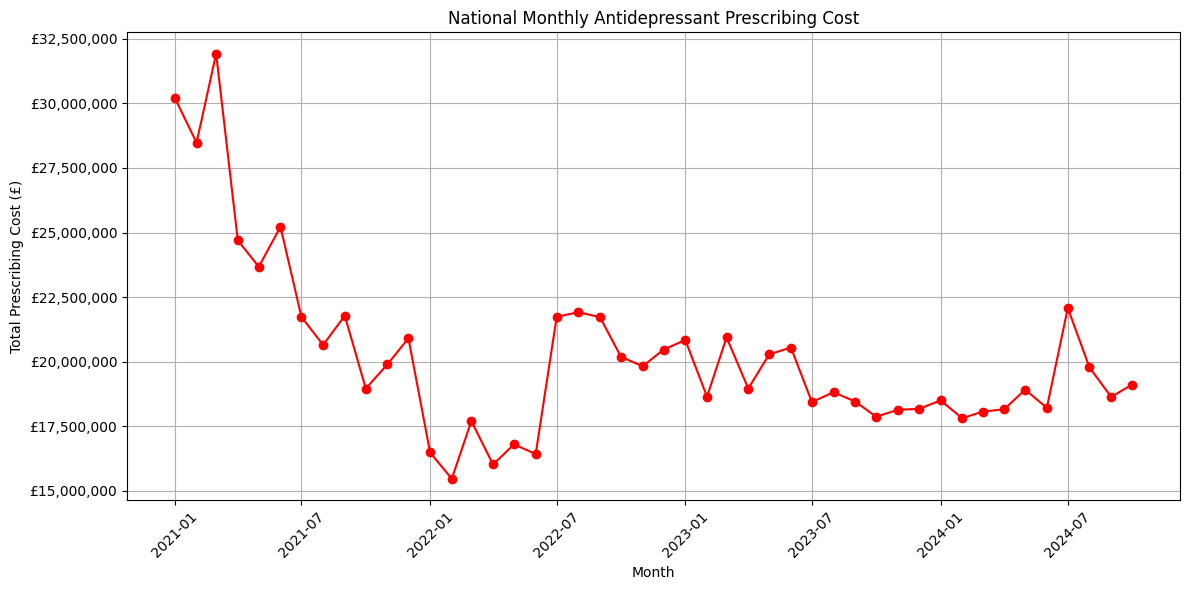


Analysis of Monthly Trends:
The monthly items chart shows some seasonal variation, with peaks and troughs throughout the year.  The overall trend seems relatively stable, although there's a noticeable dip towards the end of the period. The monthly cost chart, however, shows a more consistent upward trend, particularly from mid-2023 onwards, even while item numbers are relatively flat or declining.  This confirms the earlier observation that costs are rising faster than item counts.

Drugs with Highest Average Cost per Item (Across All Years):


<ipython-input-49-66fdc12e91de>:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  drug_item_cost = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index = False).apply(lambda x: (x['COST'].sum()/x['ITEMS'].sum()))


,BNF_CHEMICAL_SUBSTANCE,Average Cost Per Item
26,Tranylcypromine sulfate,1326.574531
19,Nefazodone hydrochloride,639.803333
28,Trimipramine maleate,379.668153
14,Isocarboxazid,344.296406
23,Phenelzine sulfate,306.502497
7,Doxepin,200.314848
2,Amoxapine,183.680000
29,Tryptophan,110.622283
16,Mianserin hydrochloride,61.792721
21,Oxitriptan,52.667220



Drugs with Highest Total Cost (Across All Years):


,BNF_CHEMICAL_SUBSTANCE,COST
25,Sertraline hydrochloride,2.056530e+08
30,Venlafaxine,1.503813e+08
1,Amitriptyline hydrochloride,9.273951e+07
10,Fluoxetine hydrochloride,8.143143e+07
3,Citalopram hydrobromide,7.522518e+07
17,Mirtazapine,6.227576e+07
8,Duloxetine hydrochloride,5.487333e+07
31,Vortioxetine,2.859020e+07
28,Trimipramine maleate,2.567658e+07
26,Tranylcypromine sulfate,2.179562e+07


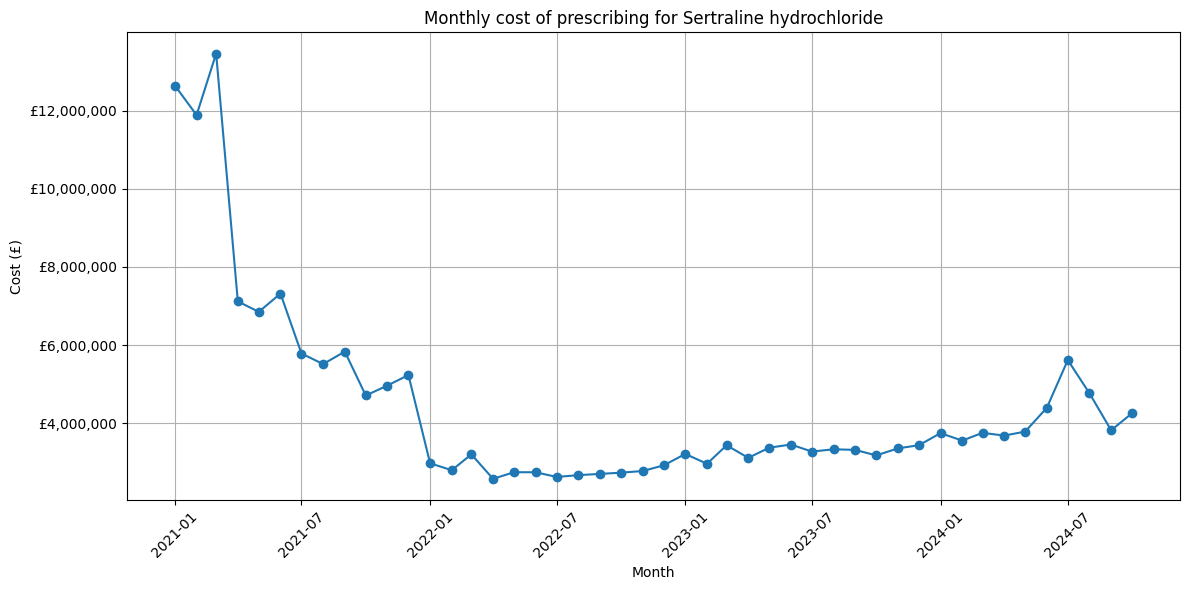

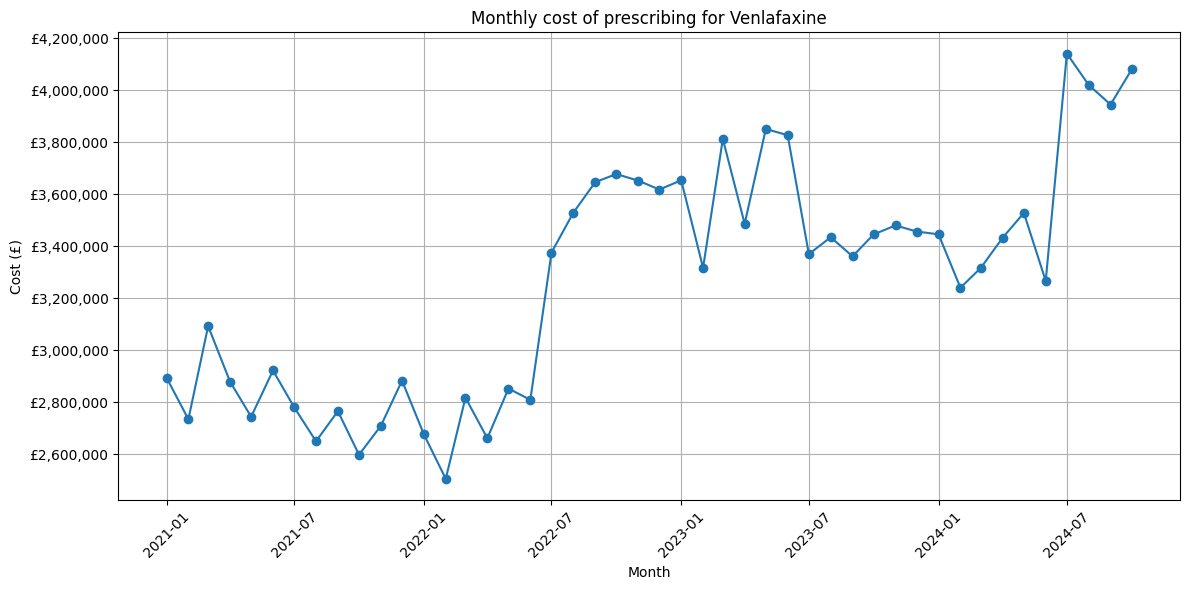

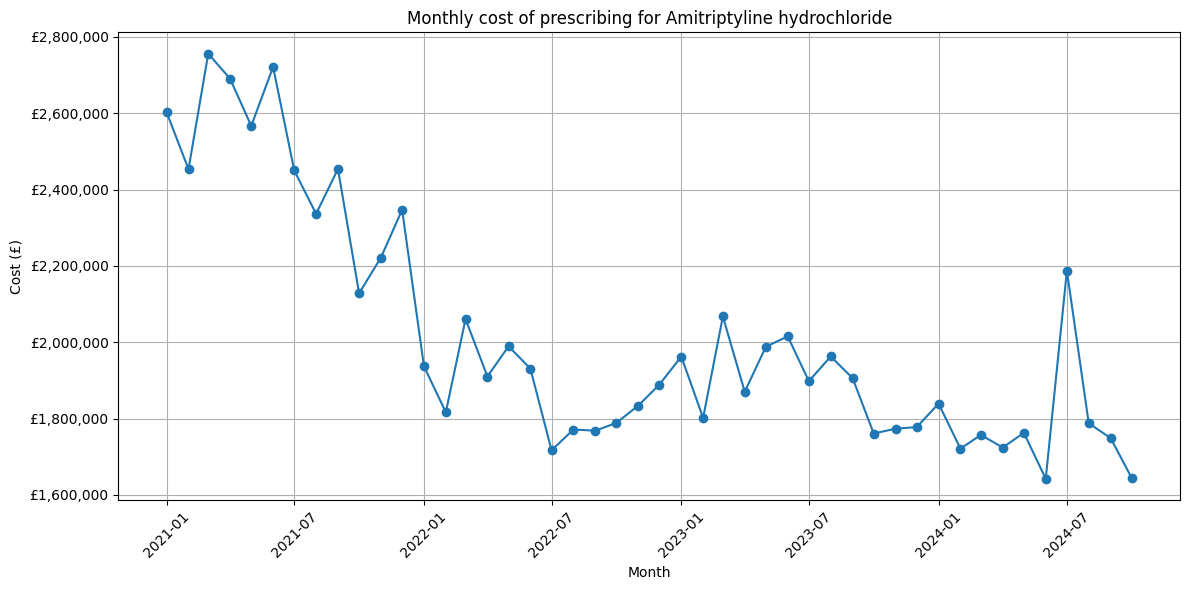

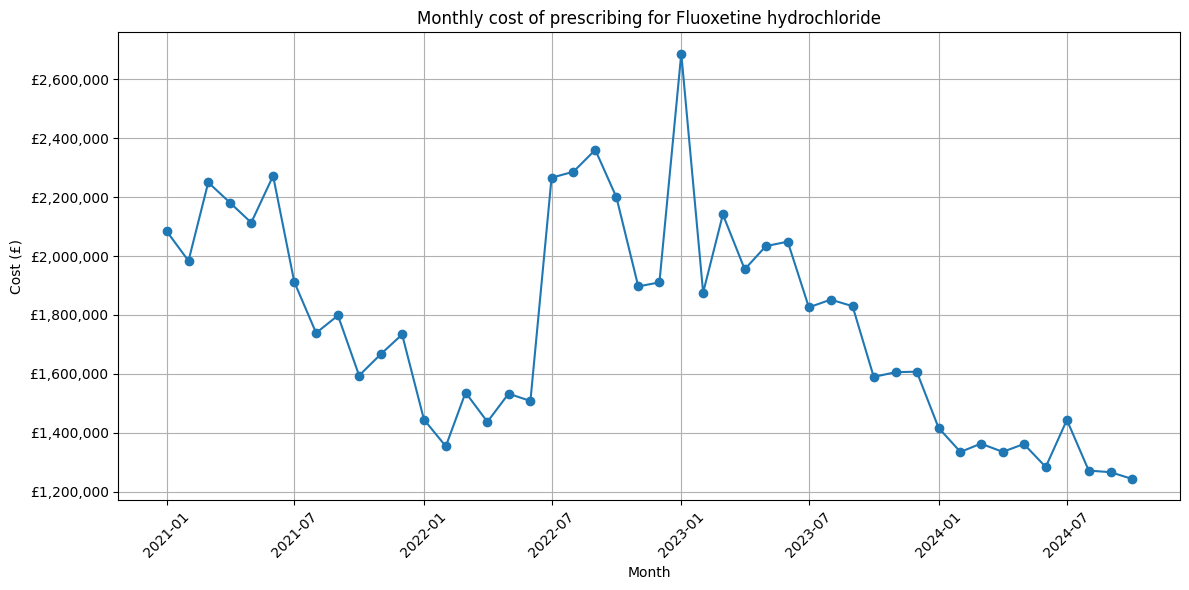

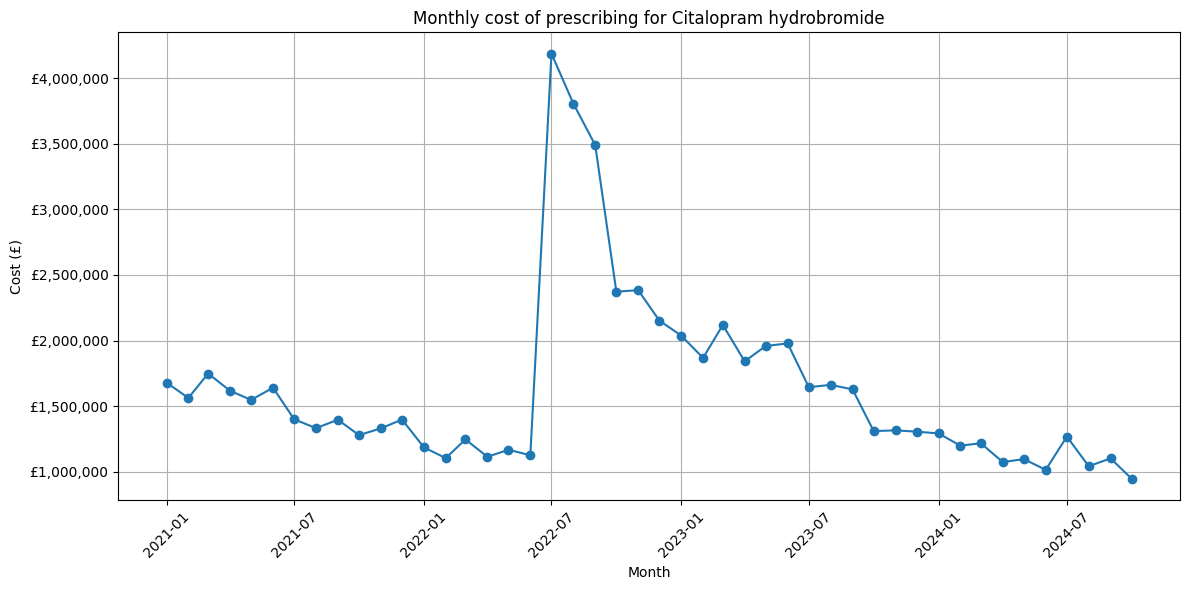


Analysis of Drugs Driving Trends:
By examining the average cost per item and the total cost per drug, we can identify potential drivers of the cost increase.  Drugs with a high average cost per item contribute more to the overall cost, even if they are not the most frequently prescribed.  Plotting the monthly cost trends for the top 5 drugs by total cost reveals which drugs have experienced the most significant cost increases over time.  For instance, if a drug's monthly cost chart shows a steep upward trend, that drug is a major contributor to the overall national cost increase.

High-Level Summary:
National antidepressant prescribing costs have been increasing, even as the number of items prescribed has remained relatively stable or slightly decreased.  This indicates a rise in the cost per item. Regional variations exist, with some regions showing more significant cost increases than others. The top 10 lists of drugs by items and cost reveal differences, highlighting that some less

In [ ]:
# Group by month and sum items
monthly_items_df = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['ITEMS'].sum()
monthly_items_df['YEAR_MONTH'] = pd.to_datetime(monthly_items_df['YEAR_MONTH'], format='%Y%m')

# Group by month and sum cost
monthly_cost_df = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['COST'].sum()
monthly_cost_df['YEAR_MONTH'] = pd.to_datetime(monthly_cost_df['YEAR_MONTH'], format='%Y%m')

# Create the line chart for Items
plt.figure(figsize=(12, 6))
plt.plot(monthly_items_df['YEAR_MONTH'], monthly_items_df['ITEMS'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Items Prescribed')
plt.title('National Monthly Antidepressant Prescribing (Items)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create the line chart for Cost
plt.figure(figsize=(12, 6))
plt.plot(monthly_cost_df['YEAR_MONTH'], monthly_cost_df['COST'], marker='o', linestyle='-', color='r')
plt.xlabel('Month')
plt.ylabel('Total Prescribing Cost (£)')
plt.title('National Monthly Antidepressant Prescribing Cost')
plt.grid(True)
plt.xticks(rotation=45)

# Format y-axis as currency
def currency_formatter(x, pos):
    return f'£{x:,.0f}'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

plt.tight_layout()
plt.show()


print("\nAnalysis of Monthly Trends:")
print("The monthly items chart shows some seasonal variation, with peaks and troughs throughout the year.  \
The overall trend seems relatively stable, although there's a noticeable dip towards the end of the period. \
The monthly cost chart, however, shows a more consistent upward trend, particularly from mid-2023 onwards, \
even while item numbers are relatively flat or declining.  This confirms the earlier observation that costs \
are rising faster than item counts.")


# Exploring Drugs Driving the Trends

# Calculate average monthly cost per item for each drug
drug_item_cost = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index = False).apply(lambda x: (x['COST'].sum()/x['ITEMS'].sum()))
drug_item_cost.rename(columns={None:'Average Cost Per Item'}, inplace=True)

# Sort to find drugs with the largest increase in cost per item.
drug_item_cost = drug_item_cost.sort_values('Average Cost Per Item', ascending=False)
print("\nDrugs with Highest Average Cost per Item (Across All Years):")
display(drug_item_cost.head(10))

# Calculate total cost per drug over the entire period
total_cost_per_drug = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['COST'].sum()
total_cost_per_drug = total_cost_per_drug.sort_values('COST', ascending=False)

print("\nDrugs with Highest Total Cost (Across All Years):")
display(total_cost_per_drug.head(10))

# Time series analysis per drug (Top 5 by total cost)
top_5_drugs = total_cost_per_drug.head(5)['BNF_CHEMICAL_SUBSTANCE'].tolist()  # Get the names of the top 5

# Create the Time Series for the top 5 drugs
for drug in top_5_drugs:
  #Filter for each drug.
  drug_df = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == drug]
  #Group by month
  drug_df_monthly = drug_df.groupby('YEAR_MONTH', as_index = False)['COST'].sum()
  #convert to date time
  drug_df_monthly['YEAR_MONTH'] = pd.to_datetime(drug_df_monthly['YEAR_MONTH'], format='%Y%m')

  #plotting
  plt.figure(figsize = (12,6))
  plt.plot(drug_df_monthly['YEAR_MONTH'], drug_df_monthly['COST'], marker = 'o', linestyle = '-')
  plt.xlabel('Month')
  plt.ylabel('Cost (£)')
  plt.title(f'Monthly cost of prescribing for {drug}')
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))
  plt.tight_layout()
  plt.show()

print("\nAnalysis of Drugs Driving Trends:")
print("By examining the average cost per item and the total cost per drug, \
we can identify potential drivers of the cost increase.  Drugs with a high average cost per item \
contribute more to the overall cost, even if they are not the most frequently prescribed.  \
Plotting the monthly cost trends for the top 5 drugs by total cost reveals which drugs have experienced \
the most significant cost increases over time.  For instance, if a drug's monthly cost chart shows a steep \
upward trend, that drug is a major contributor to the overall national cost increase.")

print("\nHigh-Level Summary:")
print("National antidepressant prescribing costs have been increasing, even as the number of items prescribed \
has remained relatively stable or slightly decreased.  This indicates a rise in the cost per item. \
Regional variations exist, with some regions showing more significant cost increases than others. \
The top 10 lists of drugs by items and cost reveal differences, highlighting that some less frequently \
prescribed drugs have a disproportionately high cost. Further investigation (as shown in the time series plots) \
into the specific drugs driving these cost increases is warranted.")

## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.



Case Study: Sertraline and Escitalopram

Analysis for Sertraline hydrochloride
Sertraline hydrochloride accounts for 25.64% of total antidepressant items and 22.07% of total cost.
Mean cost per item for Sertraline hydrochloride: £2.41


<ipython-input-50-17a383ebcfad>:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_drug_df = drug_df.groupby(['YEAR_MONTH', 'REGION_NAME'], as_index=False).apply(lambda x: pd.Series({


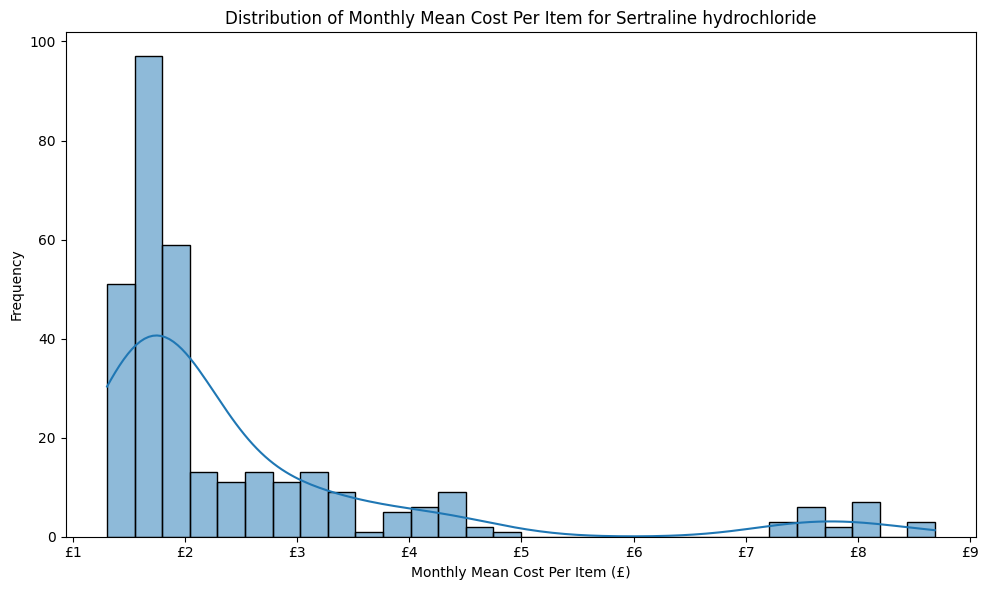

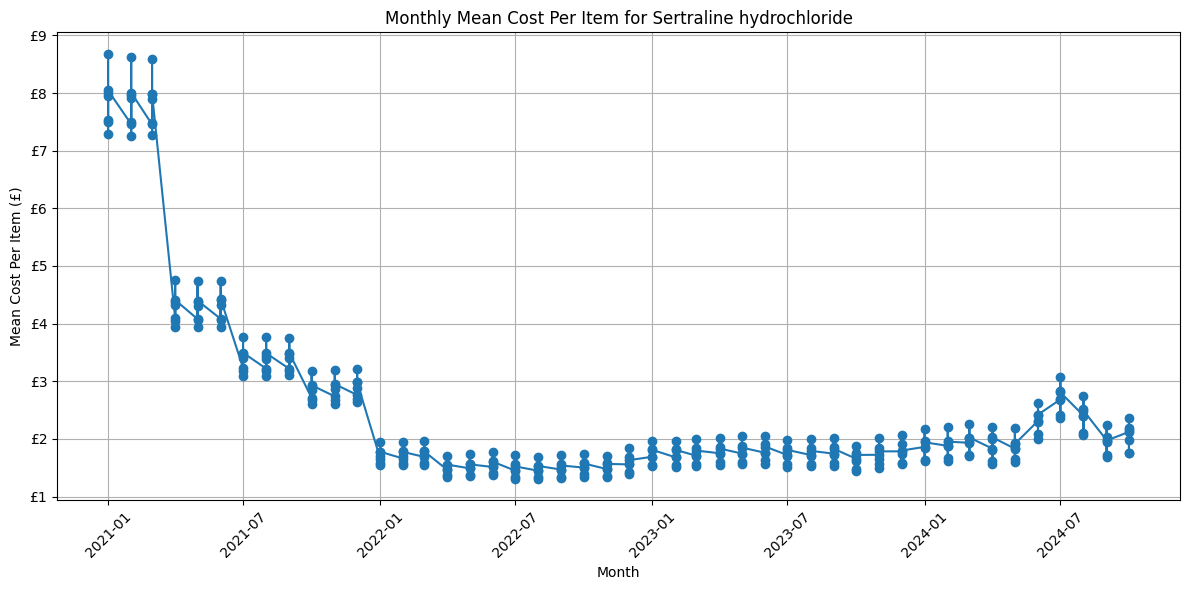

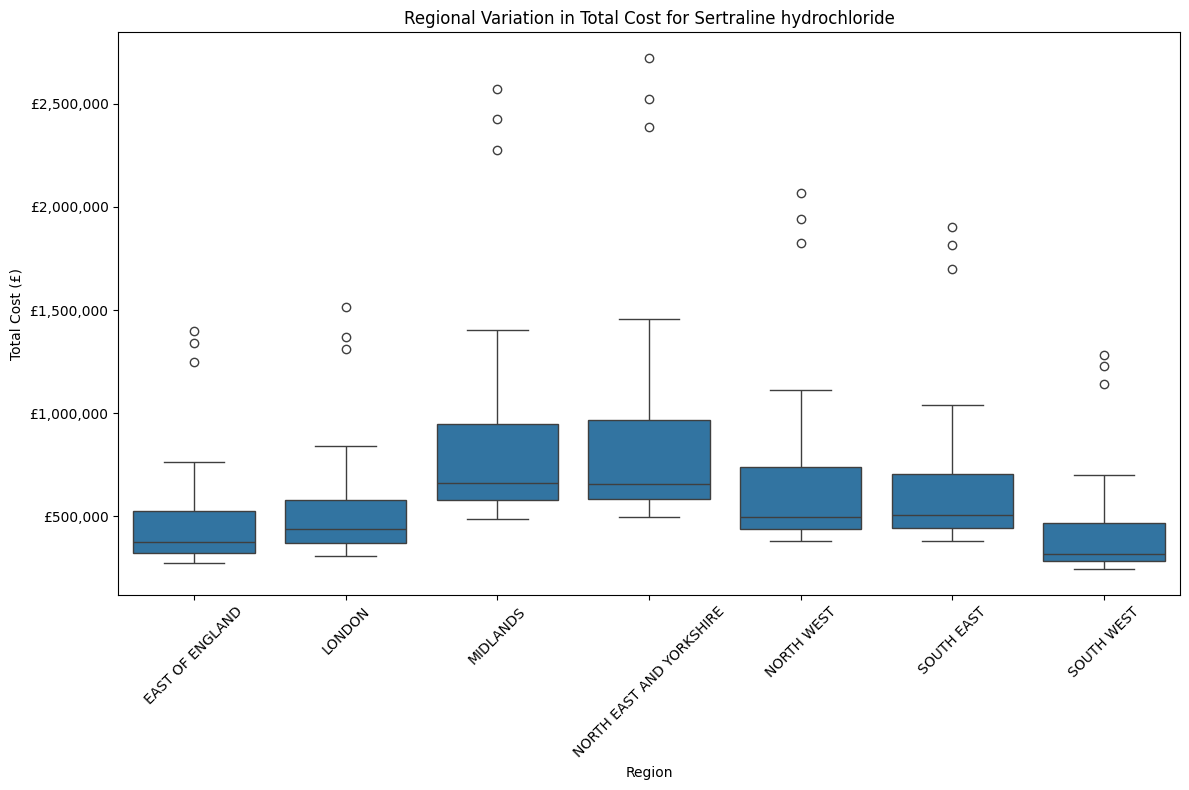

Analysis for Escitalopram
Escitalopram accounts for 1.98% of total antidepressant items and 1.38% of total cost.
Mean cost per item for Escitalopram: £1.95


<ipython-input-50-17a383ebcfad>:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_drug_df = drug_df.groupby(['YEAR_MONTH', 'REGION_NAME'], as_index=False).apply(lambda x: pd.Series({


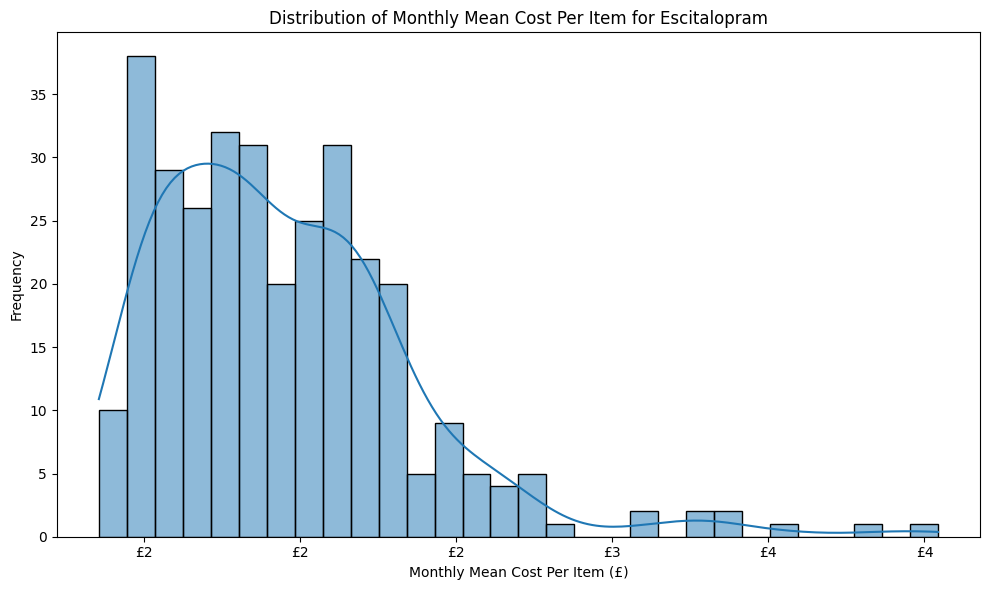

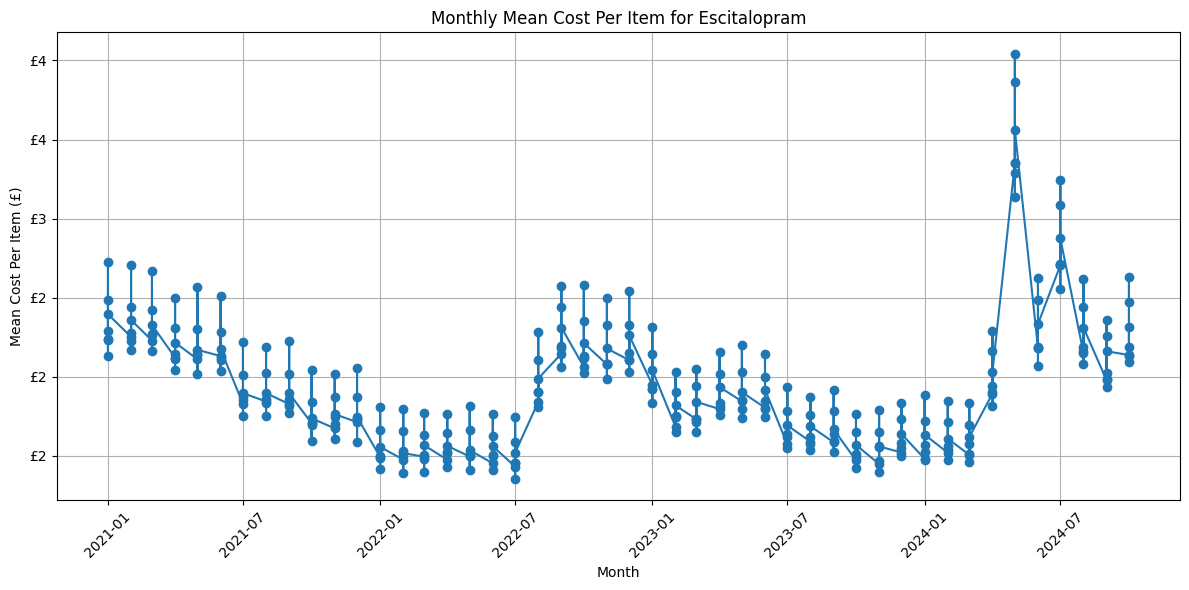

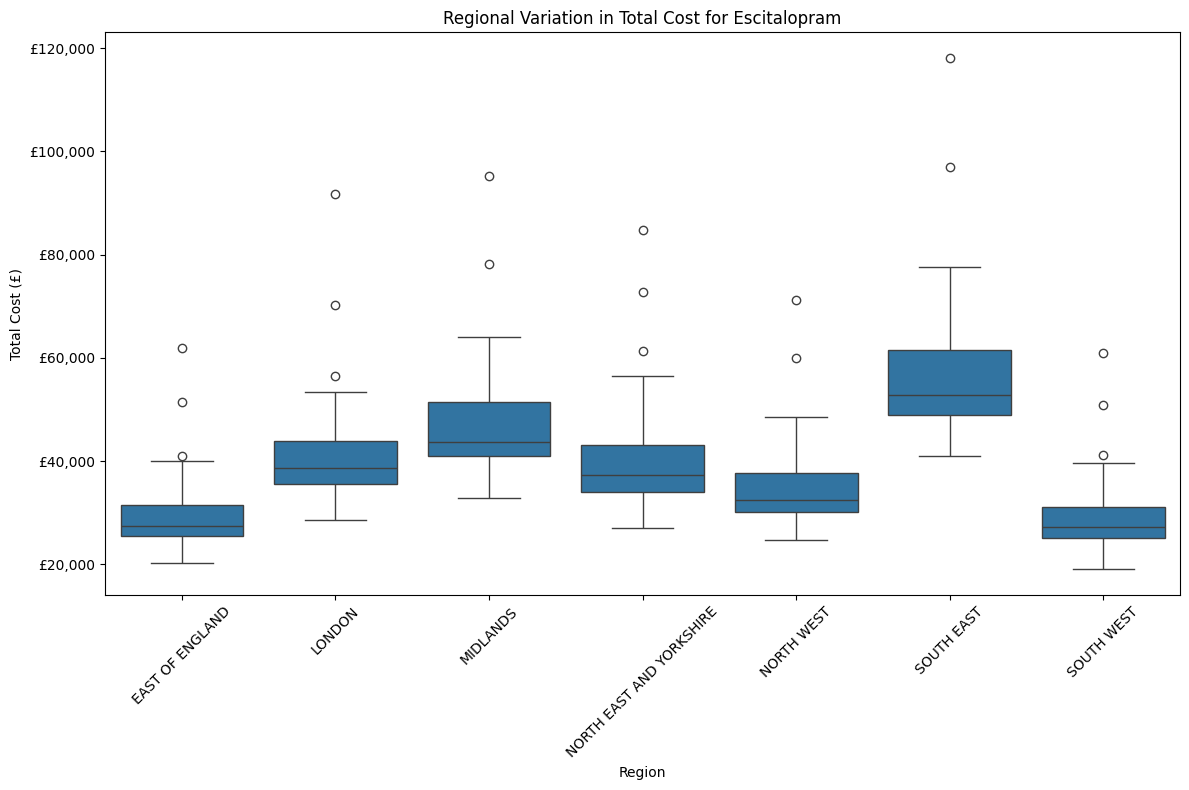


High-Level Summary:
This case study focused on Sertraline and Escitalopram, two significant antidepressants in terms of both volume and cost.  We examined their contribution to the overall totals, their mean cost per item, the distribution of monthly mean costs, and regional variations. These analyses provide a deeper understanding of the specific factors driving the observed national trends.


In [ ]:
import seaborn as sns

print("Case Study: Sertraline and Escitalopram\n")

drugs_of_interest = ['Sertraline hydrochloride', 'Escitalopram']

for drug in drugs_of_interest:
    print(f"Analysis for {drug}")

    drug_df = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == drug]

    # 1. Percentage of total antidepressant volume and cost
    total_items = pca_regional_drug_summary_df['ITEMS'].sum()
    drug_items = drug_df['ITEMS'].sum()
    percentage_volume = (drug_items / total_items) * 100

    total_cost = pca_regional_drug_summary_df['COST'].sum()
    drug_cost = drug_df['COST'].sum()
    percentage_cost = (drug_cost / total_cost) * 100

    print(f"{drug} accounts for {percentage_volume:.2f}% of total antidepressant items and {percentage_cost:.2f}% of total cost.")

    # 2. Mean cost per item
    mean_cost_per_item = drug_df['COST'].sum() / drug_df['ITEMS'].sum()
    print(f"Mean cost per item for {drug}: £{mean_cost_per_item:,.2f}")

    # 3. Distribution of mean cost per item (monthly)
    monthly_drug_df = drug_df.groupby(['YEAR_MONTH', 'REGION_NAME'], as_index=False).apply(lambda x: pd.Series({
        'Monthly_Mean_Cost_Per_Item': (x['COST'].sum() / x['ITEMS'].sum()) if x['ITEMS'].sum() > 0 else 0,
        'YEAR_MONTH': x['YEAR_MONTH'].iloc[0]  # Keep YEAR_MONTH
    }))

    # Convert YEAR_MONTH to datetime objects
    monthly_drug_df['YEAR_MONTH'] = pd.to_datetime(monthly_drug_df['YEAR_MONTH'], format='%Y%m')


    plt.figure(figsize=(10, 6))
    sns.histplot(monthly_drug_df['Monthly_Mean_Cost_Per_Item'], kde=True, bins=30)
    plt.xlabel('Monthly Mean Cost Per Item (£)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Monthly Mean Cost Per Item for {drug}')
        # Format y-axis as currency
    def currency_formatter(x, pos):
        return f'£{x:,.0f}'
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))
    plt.tight_layout()
    plt.show()

    # 4. Time series of monthly mean cost per item.
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_drug_df['YEAR_MONTH'], monthly_drug_df['Monthly_Mean_Cost_Per_Item'], marker='o', linestyle='-')
    plt.xlabel("Month")
    plt.ylabel("Mean Cost Per Item (£)")
    plt.title(f"Monthly Mean Cost Per Item for {drug}")
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # 5. Regional Variation in Cost (Boxplot)
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='REGION_NAME', y='COST', data=drug_df)
    plt.xlabel('Region')
    plt.ylabel('Total Cost (£)')
    plt.title(f'Regional Variation in Total Cost for {drug}')
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))
    plt.tight_layout()
    plt.show()



print("\nHigh-Level Summary:")
print("This case study focused on Sertraline and Escitalopram, two significant antidepressants in terms \
of both volume and cost.  We examined their contribution to the overall totals, their mean cost per item, \
the distribution of monthly mean costs, and regional variations. These analyses provide a deeper understanding \
of the specific factors driving the observed national trends.")